In [1]:
# importing libraries for loading DataSet

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('rainfall.csv')

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
# Checking Dtypes

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
# Checking duplicate values

In [9]:
df.duplicated().value_counts()

False    6762
True     1663
dtype: int64

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().value_counts()

False    6762
dtype: int64

In [13]:
# Checking data loss percentage

In [14]:
dlp=(8425-6762)/8425*100

In [15]:
dlp

19.73887240356083

In [28]:
# Checking Null Values

In [29]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
sii=SimpleImputer(strategy='mean')
sio=SimpleImputer(strategy='most_frequent')

In [32]:
listo=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
listi=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for i in listo:
    df[i]=sio.fit_transform(df[i].values.reshape(-1,1))
for i in listi:
    df[i]=sii.fit_transform(df[i].values.reshape(-1,1))

In [33]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.302395,7.890896,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.302395,7.890896,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.302395,7.890896,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.302395,7.890896,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.302395,7.890896,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.302395,7.890896,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.302395,7.890896,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.302395,7.890896,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.302395,7.890896,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [34]:
# Now Again Checking Null Values

In [35]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [36]:
# Now There are No Null Values present

In [37]:
# Now Lets See statistical summary of Dataset to see mean , median , mode , min, max ,std, etc

In [39]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6762,6762,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762,6762.000000,6762,...,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762,6762
unique,3004,12,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2011-02-11,PerthAirport,NaN,NaN,NaN,NaN,NaN,E,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,4,1204,NaN,NaN,NaN,NaN,NaN,1460,NaN,1403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5190,5190
mean,NaN,NaN,13.109145,24.098345,2.780148,5.302395,7.890896,NaN,38.977663,NaN,...,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,NaN,NaN
std,NaN,NaN,5.540667,6.130123,10.482769,3.343713,2.733639,NaN,13.376457,NaN,...,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,NaN,NaN
min,NaN,NaN,-2.000000,8.200000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,NaN,NaN
25%,NaN,NaN,9.000000,19.600000,0.000000,4.000000,7.890896,NaN,30.000000,NaN,...,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,NaN,NaN
50%,NaN,NaN,13.109145,23.500000,0.000000,5.302395,7.890896,NaN,38.977663,NaN,...,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,NaN,NaN
75%,NaN,NaN,17.400000,28.400000,1.200000,5.302395,9.200000,NaN,46.000000,NaN,...,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,NaN,NaN


In [40]:
# Now Lets check correlations

In [41]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.728065,0.092371,0.269812,0.039286,0.242738,0.169397,0.188276,-0.154248,0.067683,-0.441253,-0.440363,0.095403,0.047495,0.891425,0.696419
MaxTemp,0.728065,1.000000,-0.087657,0.347231,0.355675,0.165528,0.056377,0.115623,-0.424951,-0.430526,-0.337845,-0.413150,-0.245116,-0.241542,0.866584,0.974695
Rainfall,0.092371,-0.087657,1.000000,-0.000755,-0.191656,0.089987,0.051829,0.022696,0.228654,0.243394,-0.073004,-0.034081,0.196189,0.162653,-0.004172,-0.091987
Evaporation,0.269812,0.347231,-0.000755,1.000000,0.266157,0.163857,0.132703,0.113176,-0.245437,-0.190148,-0.201959,-0.216711,-0.074490,-0.121875,0.317396,0.340045
Sunshine,0.039286,0.355675,-0.191656,0.266157,1.000000,0.007625,0.008813,0.049033,-0.378872,-0.445111,-0.002095,-0.058151,-0.542442,-0.562537,0.236174,0.374244
WindGustSpeed,0.242738,0.165528,0.089987,0.163857,0.007625,1.000000,0.591784,0.620606,-0.268973,-0.095502,-0.394164,-0.363104,0.013532,0.058182,0.221725,0.129756
WindSpeed9am,0.169397,0.056377,0.051829,0.132703,0.008813,0.591784,1.000000,0.551348,-0.373061,-0.121519,-0.177664,-0.147296,-0.024997,0.022110,0.152106,0.041762
WindSpeed3pm,0.188276,0.115623,0.022696,0.113176,0.049033,0.620606,0.551348,1.000000,-0.259812,-0.100704,-0.248316,-0.208384,-0.013567,-0.021128,0.207860,0.092975
Humidity9am,-0.154248,-0.424951,0.228654,-0.245437,-0.378872,-0.268973,-0.373061,-0.259812,1.000000,0.639470,0.137254,0.173859,0.420958,0.320440,-0.407533,-0.418024
Humidity3pm,0.067683,-0.430526,0.243394,-0.190148,-0.445111,-0.095502,-0.121519,-0.100704,0.639470,1.000000,-0.006328,0.061228,0.431851,0.458972,-0.136803,-0.500404


In [42]:
df.corr()['RainTomorrow'].sort_values(ascending=False)

KeyError: 'RainTomorrow'

In [43]:
df.corr()['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
Humidity3pm      0.243394
Humidity9am      0.228654
Cloud9am         0.196189
Cloud3pm         0.162653
MinTemp          0.092371
WindGustSpeed    0.089987
WindSpeed9am     0.051829
WindSpeed3pm     0.022696
Evaporation     -0.000755
Temp9am         -0.004172
Pressure3pm     -0.034081
Pressure9am     -0.073004
MaxTemp         -0.087657
Temp3pm         -0.091987
Sunshine        -0.191656
Name: Rainfall, dtype: float64

In [44]:
# Now Importing some Libraires for visualisation of Data

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

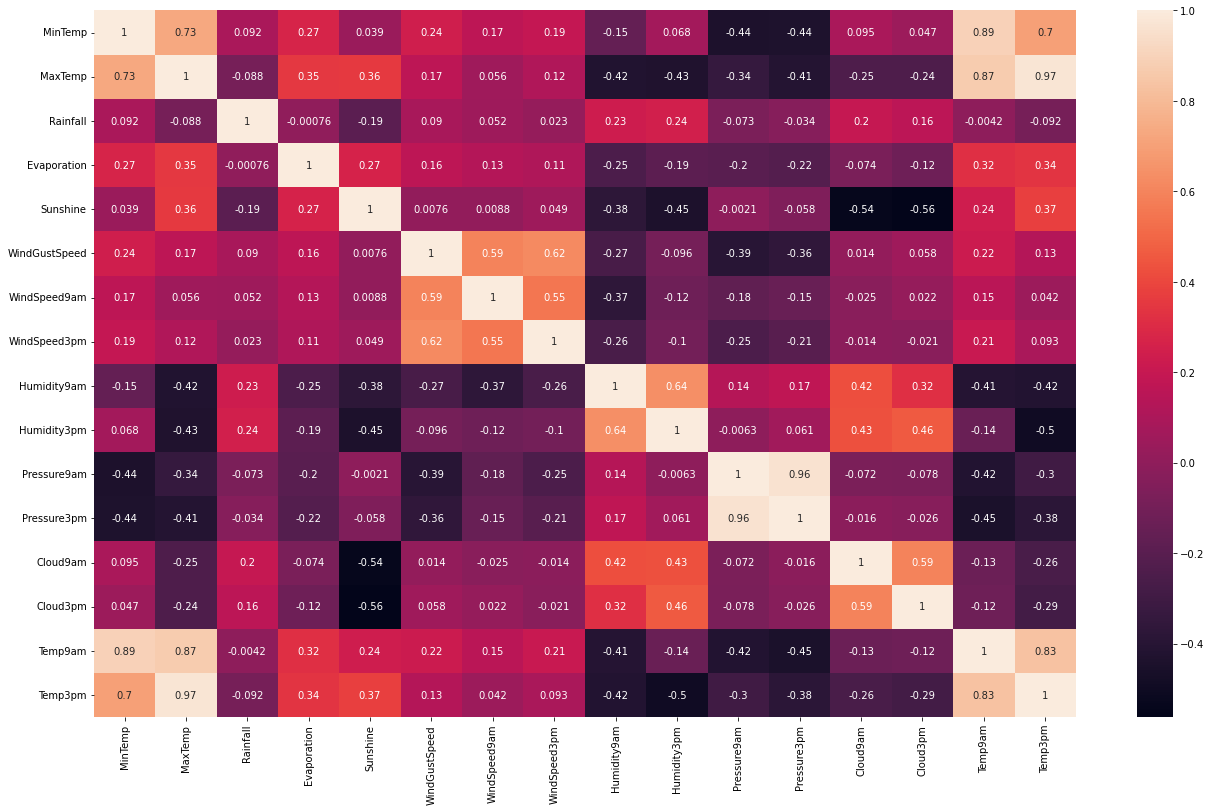

In [46]:
plt.figure(figsize=(22,13))
sns.heatmap(df.corr(),annot=True)

In [47]:
# From Above correlation we can clearly see that our data set suffers from multicollinearity

In [48]:
# Univariate Analysis

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

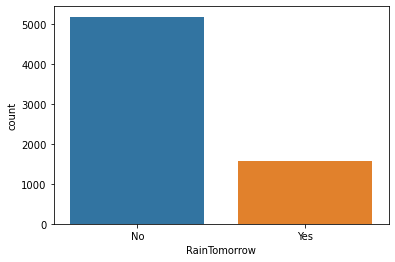

In [50]:
sns.countplot(df['RainTomorrow'])

In [51]:
# Data is imbalanced and a balancing technique is required

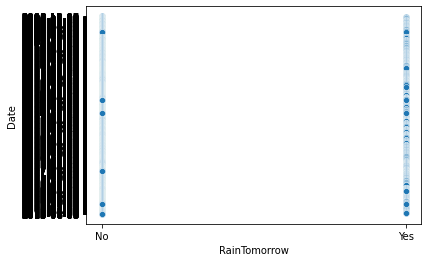

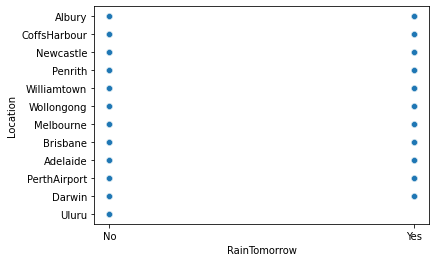

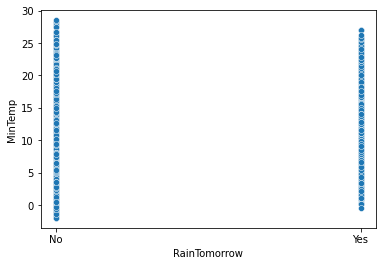

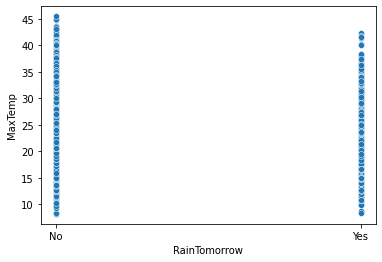

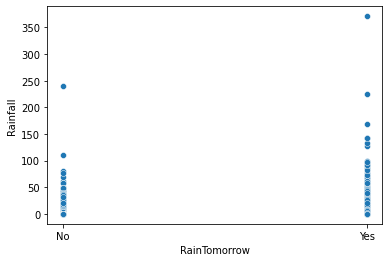

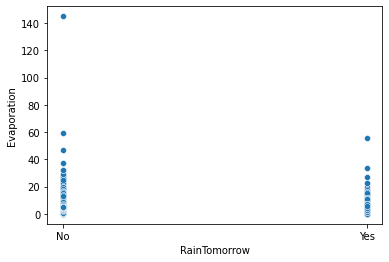

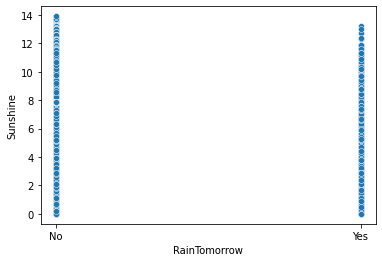

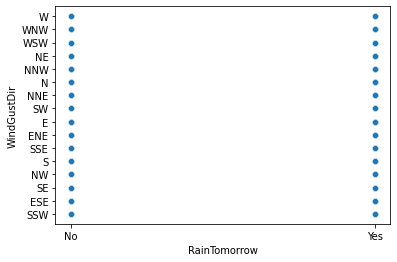

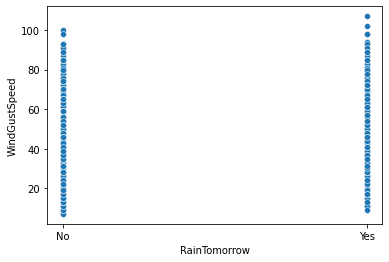

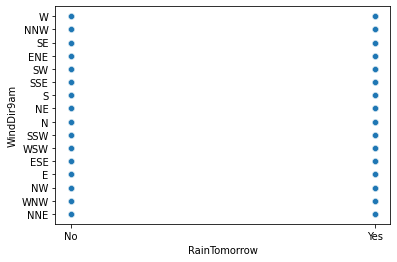

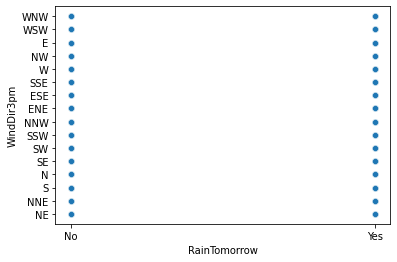

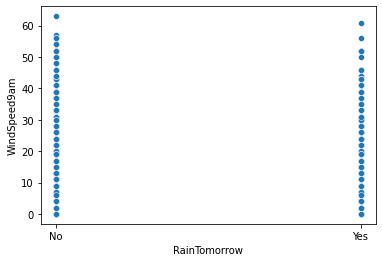

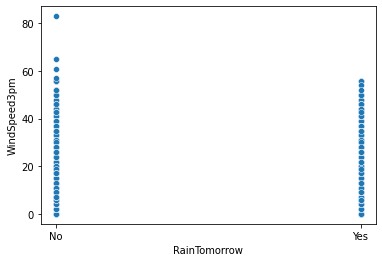

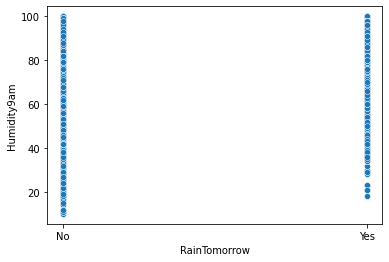

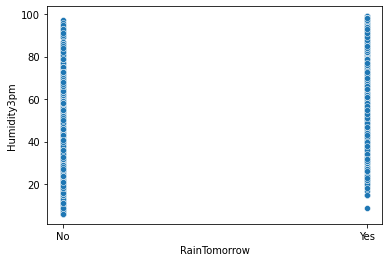

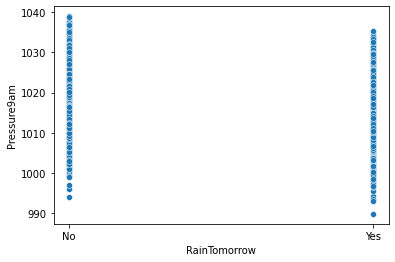

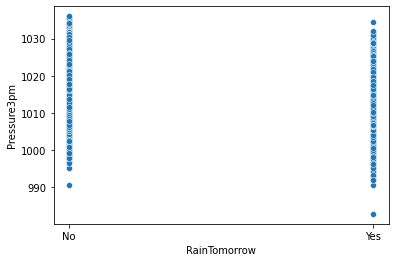

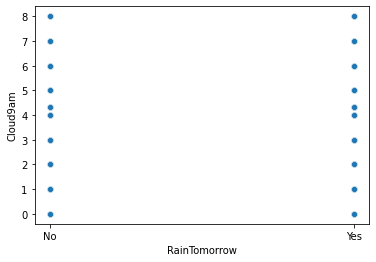

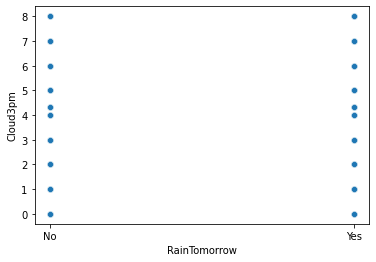

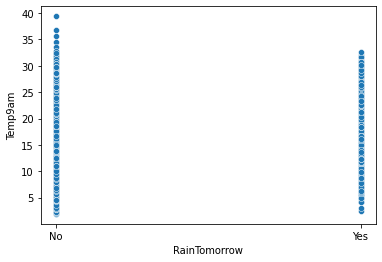

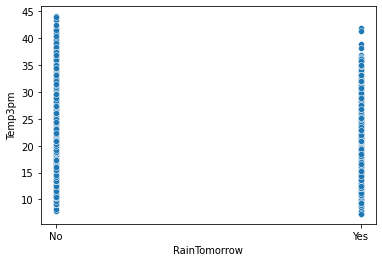

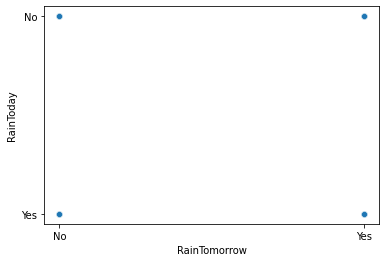

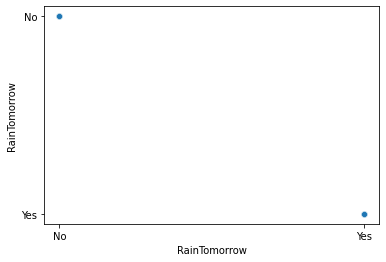

In [52]:
for i in df:
    sns.scatterplot(y=df[i],x=df['RainTomorrow'])
    plt.show()

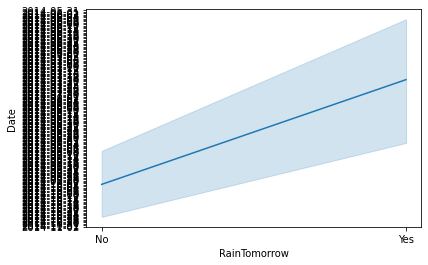

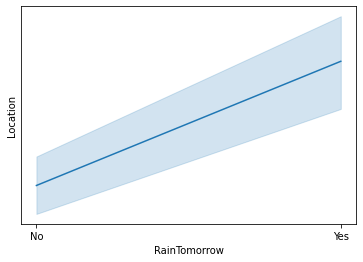

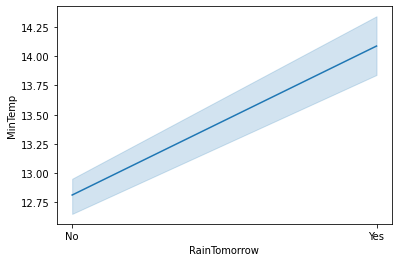

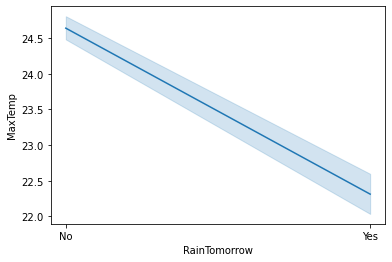

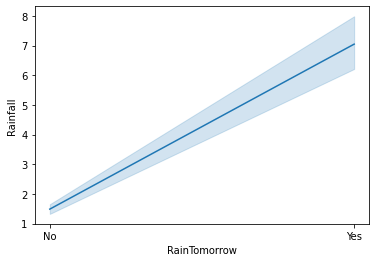

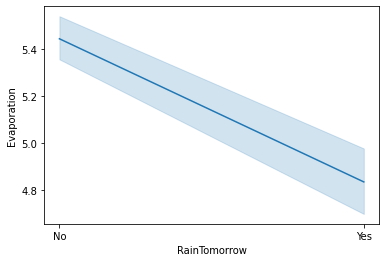

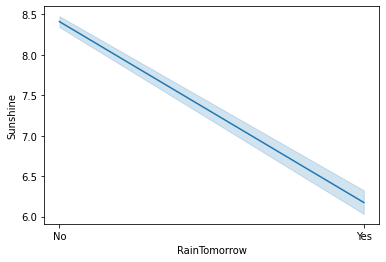

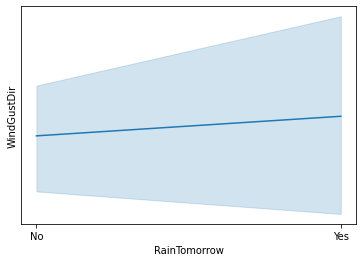

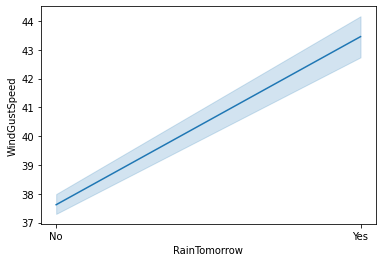

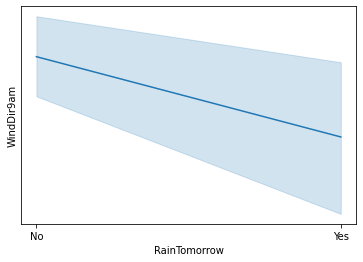

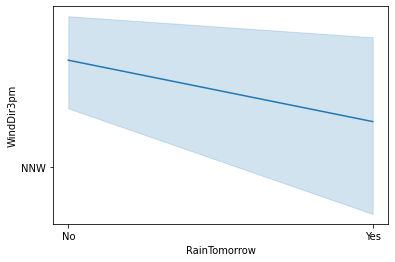

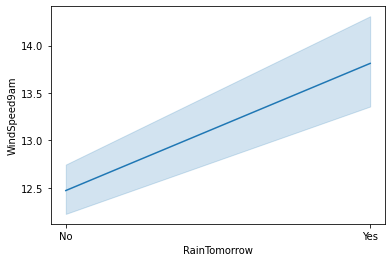

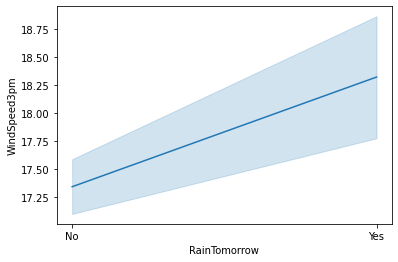

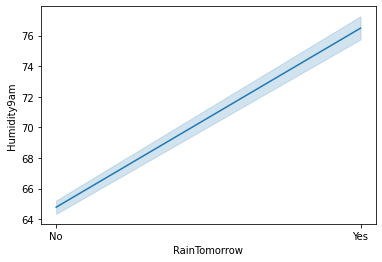

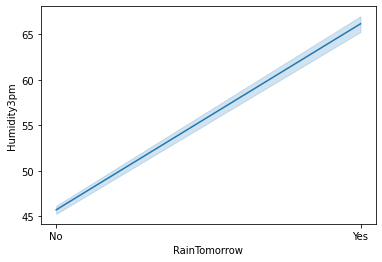

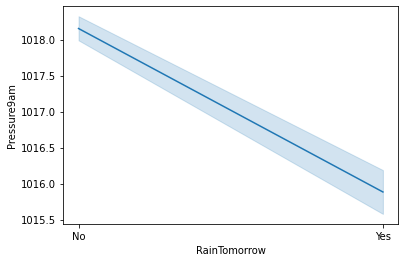

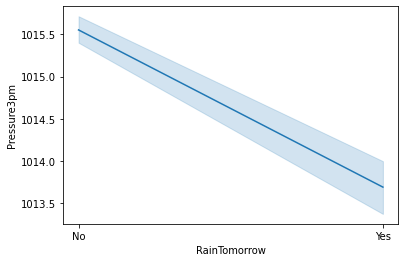

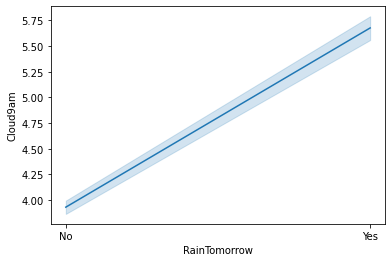

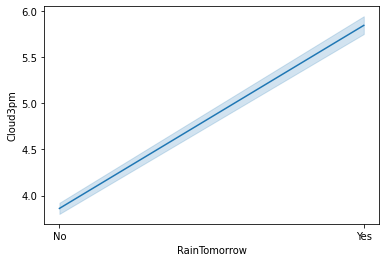

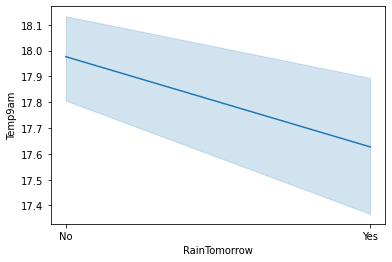

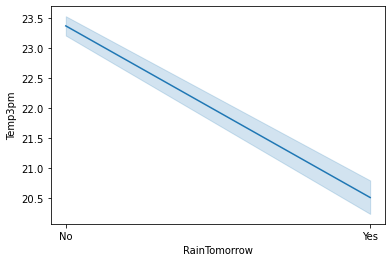

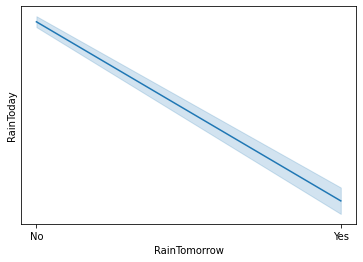

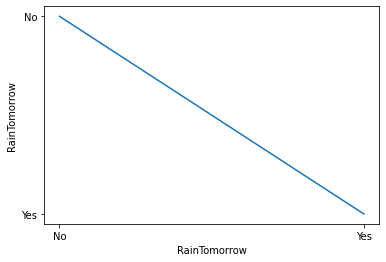

In [53]:
for i in df:
    sns.lineplot(y=df[i],x=df['RainTomorrow'])
    plt.show()

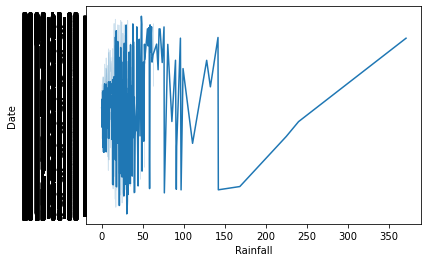

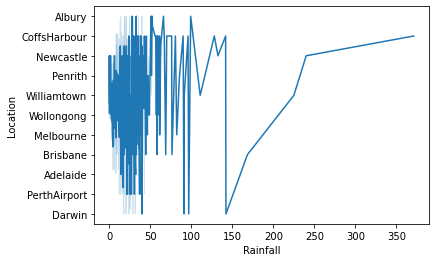

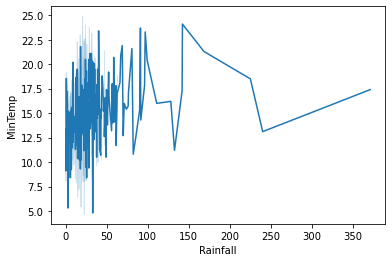

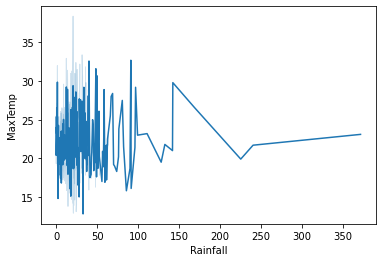

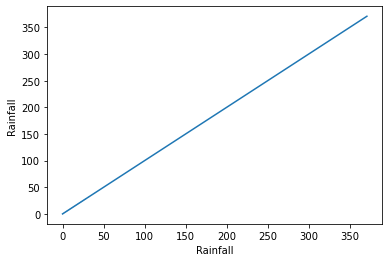

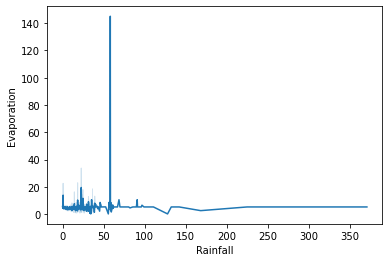

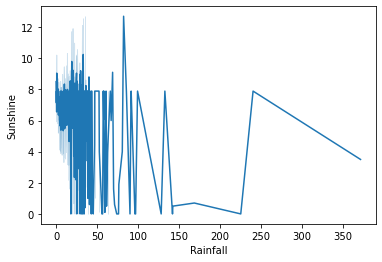

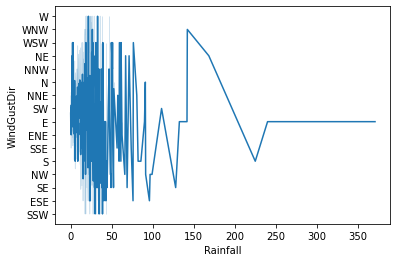

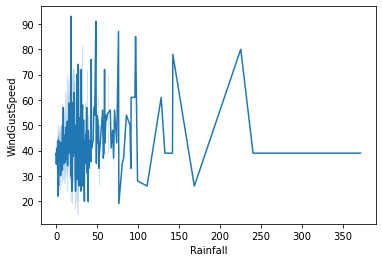

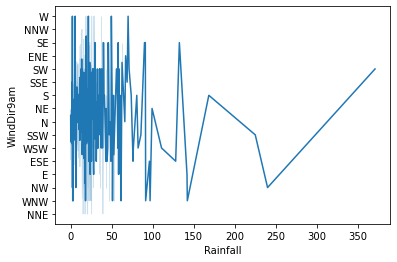

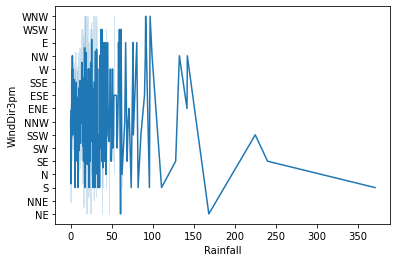

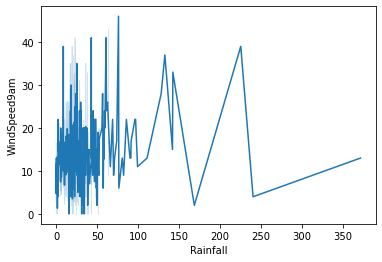

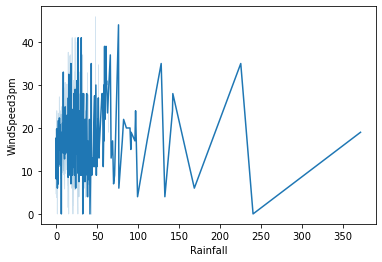

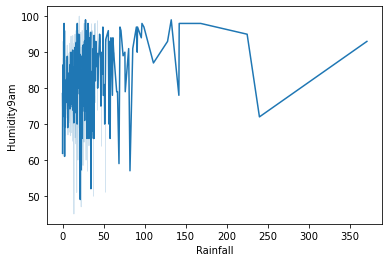

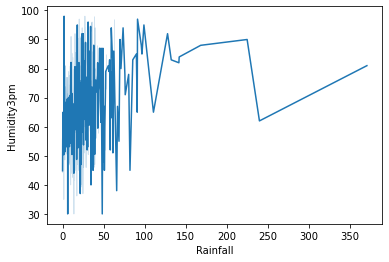

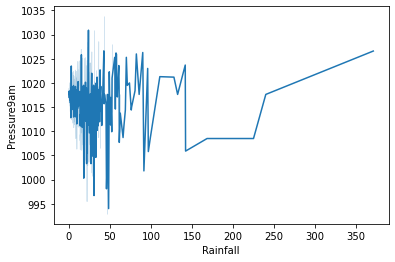

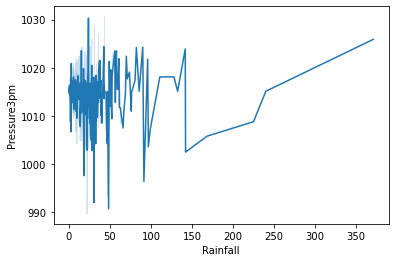

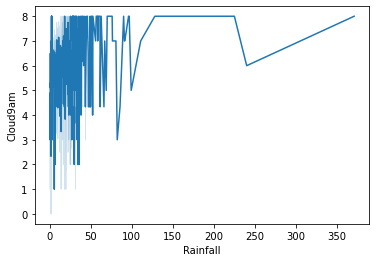

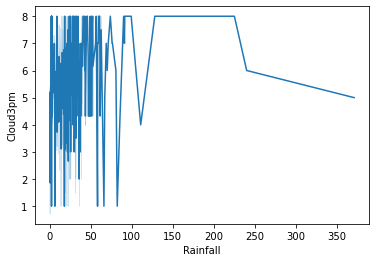

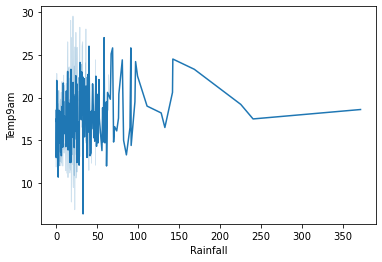

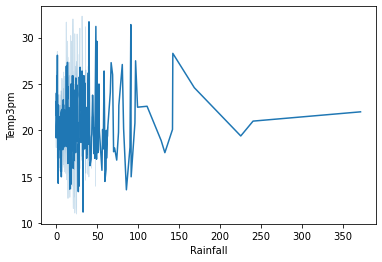

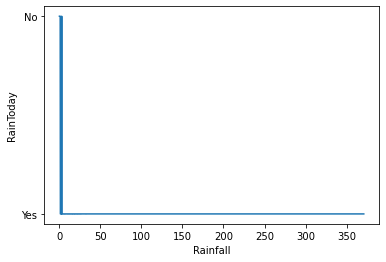

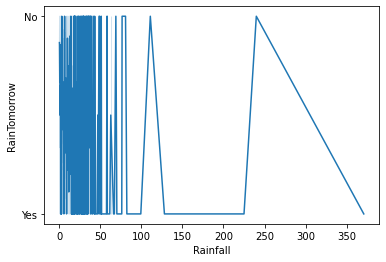

In [54]:
for i in df:
    sns.lineplot(y=df[i],x=df['Rainfall'])
    plt.show()

In [58]:
# Now Using Label Encoder to convert Obj datatype into Integer

In [59]:
listle=['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le=LabelEncoder()

In [62]:
for i in listle:
    df[i]=le.fit_transform(df[i].astype(str))

In [63]:
df.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

In [64]:
# Now Our Obj data type is converted into integer datatype

In [65]:
# Now Lets check for the distribution of Data set whethet it is normally distributed or not

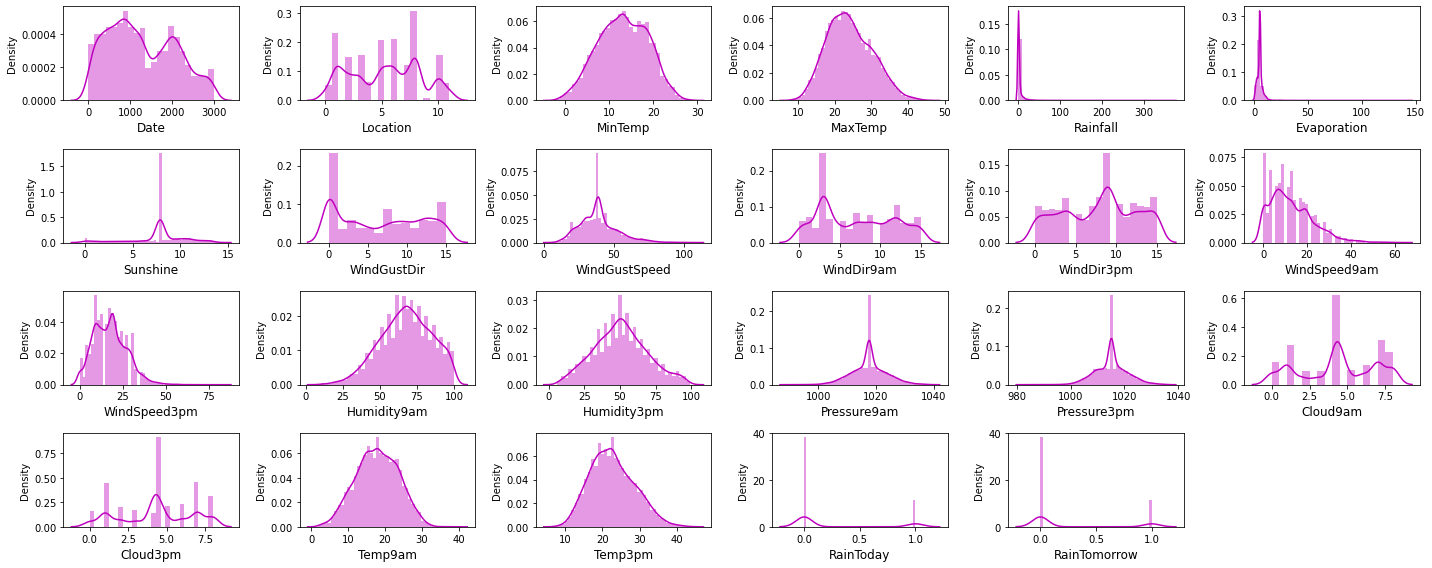

In [68]:
plt.figure(figsize=(20,8),facecolor="White")
plotnumber=1
for i in df.columns:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [69]:
# We can see that Data is nor normally distributed and skewness is present

# Removing Outliers

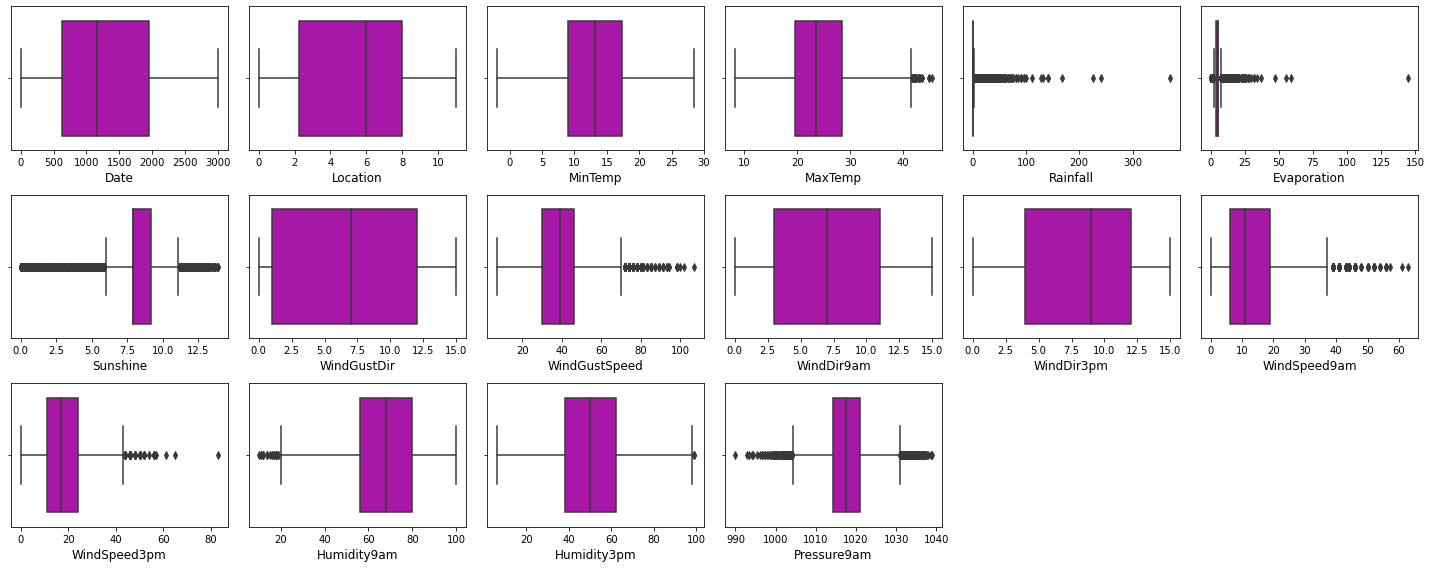

In [71]:
plt.figure(figsize=(20,8),facecolor="White")
plotnumber=1
for i in df.columns:
    if plotnumber<=16:
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [72]:
# We can clearly see that there are outliers present in data set

In [73]:
# Now Lets Quantify outliers and remove them

In [74]:
from scipy.stats import zscore

In [75]:
z=np.abs(zscore(df))

In [76]:
df=df[(z<3).all(axis=1)]

In [77]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,1,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,2,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,4,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,3000,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,3001,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0
8423,3002,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [78]:
# Now letsCheck for Data Loss Percentage

In [79]:
DLP=(6762-6409)/6762*100

In [80]:
print('Data Loss Percentage is ',DLP)

Data Loss Percentage is  5.220349009168885


# Seperating Features and Label For Amount Of Rainfall Occured

In [81]:
x1=df.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [82]:
x1.shape

(6409, 22)

In [83]:
y1=df.iloc[:,4]

In [84]:
y1.shape

(6409,)

In [85]:
# Now Lets Check for Multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
def cal_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['VIF']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return vif

In [88]:
cal_vif(x1)

,Variables,VIF
0,Date,5.544893
1,Location,6.356965
2,MinTemp,58.774389
3,MaxTemp,444.276442
4,Evaporation,10.255926
5,Sunshine,19.652777
6,WindGustDir,4.056261
7,WindGustSpeed,23.251473
8,WindDir9am,4.512790
9,WindDir3pm,5.713593


In [89]:
# Dropping columns which suffer multicollinearity

In [90]:
x1.drop(['Pressure9am'],axis=1,inplace=True)

In [91]:
cal_vif(x1)

,Variables,VIF
0,Date,5.543166
1,Location,6.345045
2,MinTemp,58.061175
3,MaxTemp,444.239825
4,Evaporation,10.188023
5,Sunshine,19.581860
6,WindGustDir,4.036914
7,WindGustSpeed,23.206105
8,WindDir9am,4.439851
9,WindDir3pm,5.466849


In [92]:
x1.drop(['Temp3pm'],axis=1,inplace=True)

In [93]:
cal_vif(x1)

,Variables,VIF
0,Date,5.543064
1,Location,6.343719
2,MinTemp,57.779126
3,MaxTemp,155.597808
4,Evaporation,10.187462
5,Sunshine,19.581744
6,WindGustDir,4.018879
7,WindGustSpeed,23.045768
8,WindDir9am,4.428275
9,WindDir3pm,5.453482


In [94]:
x1.drop(['Temp9am'],axis=1,inplace=True)

In [95]:
cal_vif(x1)

,Variables,VIF
0,Date,5.519361
1,Location,6.337554
2,MinTemp,30.294274
3,MaxTemp,92.794644
4,Evaporation,10.123494
5,Sunshine,19.386418
6,WindGustDir,4.014379
7,WindGustSpeed,22.815832
8,WindDir9am,4.426642
9,WindDir3pm,5.453186


In [96]:
x1.drop(['Pressure3pm'],axis=1,inplace=True)

In [97]:
cal_vif(x1)

,Variables,VIF
0,Date,5.484115
1,Location,6.318516
2,MinTemp,23.849033
3,MaxTemp,55.484152
4,Evaporation,10.123338
5,Sunshine,17.440402
6,WindGustDir,3.994370
7,WindGustSpeed,21.669177
8,WindDir9am,4.163625
9,WindDir3pm,5.387760


In [98]:
x1.drop(['MaxTemp'],axis=1,inplace=True)

In [99]:
cal_vif(x1)

,Variables,VIF
0,Date,5.447680
1,Location,6.316765
2,MinTemp,8.572058
3,Evaporation,9.964858
4,Sunshine,13.670761
5,WindGustDir,3.982582
6,WindGustSpeed,21.001971
7,WindDir9am,4.161290
8,WindDir3pm,5.376952
9,WindSpeed9am,5.271046


In [100]:
x1.drop(['Humidity9am'],axis=1,inplace=True)

In [101]:
cal_vif(x1)

,Variables,VIF
0,Date,5.269519
1,Location,6.316437
2,MinTemp,8.510898
3,Evaporation,9.901049
4,Sunshine,11.638206
5,WindGustDir,3.954927
6,WindGustSpeed,20.542557
7,WindDir9am,4.159134
8,WindDir3pm,5.369651
9,WindSpeed9am,4.979305


In [102]:
x1.drop(['WindGustSpeed'],axis=1,inplace=True)
cal_vif(x1)

,Variables,VIF
0,Date,5.265960
1,Location,6.247203
2,MinTemp,8.377788
3,Evaporation,9.780546
4,Sunshine,10.881803
5,WindGustDir,3.929366
6,WindDir9am,4.136661
7,WindDir3pm,5.189629
8,WindSpeed9am,4.450481
9,WindSpeed3pm,6.864736


In [103]:
# Now Lets Check Skewness in data set

In [104]:
x1.skew()

Date            0.321759
Location        0.004558
MinTemp        -0.079107
Evaporation     0.721400
Sunshine       -0.890629
WindGustDir     0.103596
WindDir9am      0.210848
WindDir3pm     -0.128886
WindSpeed9am    0.677433
WindSpeed3pm    0.341549
Humidity3pm     0.158509
Cloud9am       -0.203578
Cloud3pm       -0.147217
RainToday       1.331440
RainTomorrow    1.330358
dtype: float64

In [105]:
# Applying power tranform 

In [106]:
from sklearn.preprocessing import power_transform

In [107]:
x1_new=power_transform(x1)

In [108]:
pd.DataFrame(x1_new,columns=x1.columns).skew().sort_values(ascending=False)

RainToday       1.331440
RainTomorrow    1.330358
Evaporation     0.071784
Humidity3pm    -0.036112
Sunshine       -0.054513
WindSpeed3pm   -0.078622
MinTemp        -0.113623
WindSpeed9am   -0.132158
WindDir9am     -0.149550
Date           -0.176156
Location       -0.187327
Cloud3pm       -0.195499
Cloud9am       -0.247220
WindGustDir    -0.254011
WindDir3pm     -0.256279
dtype: float64

In [109]:
# Since RainToday and RainTomorrow are obj datatypes we cant reduce their skewness further

In [110]:
x1=pd.DataFrame(x1_new,columns=x1.columns)

In [111]:
# Now Applying the Scaling Technique 

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
ss=StandardScaler()

In [114]:
x1=ss.fit_transform(x1)

#  Making Best Model For Amount of Rainfall

In [115]:
# Using first Model Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [117]:
li=LinearRegression()

In [118]:
# FInding best Random State

In [119]:
for i in range(0,100):
    x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    li.fit(x1train,y1train)
    predli=li.predict(x1test)
    liacc=r2_score(y1test,predli)
    print('At Random state ',i,' The Accuracy is ',liacc*100)

At Random state  0  The Accuracy is  45.655018515447956
At Random state  1  The Accuracy is  48.52779115054658
At Random state  2  The Accuracy is  49.1836393756701
At Random state  3  The Accuracy is  51.67464636149353
At Random state  4  The Accuracy is  47.92380221107664
At Random state  5  The Accuracy is  48.965343781575356
At Random state  6  The Accuracy is  47.06397600030954
At Random state  7  The Accuracy is  49.904956441930416
At Random state  8  The Accuracy is  50.79229422865576
At Random state  9  The Accuracy is  48.428135049405505
At Random state  10  The Accuracy is  49.83375170453
At Random state  11  The Accuracy is  47.39729528997165
At Random state  12  The Accuracy is  48.70264055824877
At Random state  13  The Accuracy is  49.10571052559345
At Random state  14  The Accuracy is  49.163528535310576
At Random state  15  The Accuracy is  50.24597271192914
At Random state  16  The Accuracy is  49.19076685363004
At Random state  17  The Accuracy is  48.20957517011269
A

In [225]:
# 47 is best Random State

In [120]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=47)
li.fit(x1train,y1train)
predli=li.predict(x1test)
liacc=r2_score(y1test,predli)
print('At Random state 47 The Accuracy is ',liacc*100)

At Random state 47 The Accuracy is  52.1750955999426


In [121]:
# Now Checking Mean squared error and mean absolute error

In [122]:
print('MSE is',mean_squared_error(y1test,predli))
print('MAE is',mean_absolute_error(y1test,predli))

MSE is 11.254480633858389
MAE is 1.5118580589213468


In [123]:
# Now Checking the CV

In [124]:
for i in range(2,10):
    cvli=cross_val_score(li,x1,y1,cv=i)
    cvli_mean=cvli.mean()
    print('At CV ',i,' cross val score is ',cvli_mean*100,' with accuracy ',liacc*100)

At CV  2  cross val score is  48.63744916058729  with accuracy  52.1750955999426
At CV  3  cross val score is  48.25719197622267  with accuracy  52.1750955999426
At CV  4  cross val score is  48.87008423092175  with accuracy  52.1750955999426
At CV  5  cross val score is  48.851820077127215  with accuracy  52.1750955999426
At CV  6  cross val score is  48.43686207140901  with accuracy  52.1750955999426
At CV  7  cross val score is  49.021846188942206  with accuracy  52.1750955999426
At CV  8  cross val score is  48.8228112014055  with accuracy  52.1750955999426
At CV  9  cross val score is  48.29934214740972  with accuracy  52.1750955999426


In [125]:
# 7 is best CV

In [126]:
cvli=cross_val_score(li,x1,y1,cv=7)
cvli_mean=cvli.mean()
print('At CV 7 cross val score is ',cvli_mean*100,' with accuracy ',liacc*100)

At CV 7 cross val score is  49.021846188942206  with accuracy  52.1750955999426


In [127]:
# Now Using 2nd Model Lasso

In [128]:
from sklearn.linear_model import Lasso

In [129]:
ls=Lasso()

In [130]:
# Finding Best Parameters using GridSearchCV

In [131]:
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscvls=GridSearchCV(ls,parameter)
gscvls.fit(x1train,y1train)
print(gscvls.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [132]:
ls=Lasso(alpha=0.01,random_state=0)

In [133]:
ls.fit(x1train,y1train)
predls=ls.predict(x1test)
lsacc=r2_score(y1test,predls)
print('Accuracy score of lasso is ',lsacc*100)
print('MSE is ',mean_squared_error(y1test,predls))
print('MAE is ',mean_absolute_error(y1test,predls))

Accuracy score of lasso is  52.174729082120194
MSE is  11.254566885316406
MAE is  1.4998860294102665


In [134]:
# Now Checking CV

In [135]:

cvls=cross_val_score(ls,x1,y1,cv=7)
cvls_mean=cvls.mean()
print('At cv 7 cross val score is ',cvls_mean*100,' with accuracy ',lsacc*100)

At cv 7 cross val score is  49.07408549117048  with accuracy  52.174729082120194


In [136]:
# Now Using 3rd model Ridge

In [137]:
from sklearn.linear_model import Ridge

In [138]:
rg=Ridge()

In [139]:
# Finding best parameter using GridSearchCV

In [140]:
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscvrg=GridSearchCV(rg,parameter)
gscvrg.fit(x1train,y1train)
print(gscvrg.best_params_)

{'alpha': 10, 'random_state': 0}


In [141]:
rg=Ridge(alpha=10,random_state=0)
rg.fit(x1train,y1train)
predrg=rg.predict(x1test)
rgacc=r2_score(y1test,predrg)
print('Accuracy score of ridge is ',rgacc*100)
print('MSE is ',mean_squared_error(y1test,predrg))
print('MAE is ',mean_absolute_error(y1test,predrg))

Accuracy score of ridge is  52.16282940281343
MSE is  11.257367198500242
MAE is  1.5121165164512584


In [142]:
# Now Checking it with CV

In [143]:
# 7 is best cv

In [144]:
cvrg=cross_val_score(rg,x1,y1,cv=7)
cvrg_mean=cvrg.mean()
print('At cv 7 cross val score is ',cvrg_mean*100,' with accuracy ',rgacc*100)

At cv 7 cross val score is  49.0226396009641  with accuracy  52.16282940281343


In [145]:
# Now using 4th model SVR

In [146]:
from sklearn.svm import SVR

In [147]:
svr=SVR()

In [148]:
# Using GridSearchCV to find best parameter

In [149]:
parameter={'kernel':['rbf','poly','linear']}
gscvsvr=GridSearchCV(svr,parameter)
gscvsvr.fit(x1train,y1train)
print(gscvsvr.best_params_)

{'kernel': 'rbf'}


In [151]:
svr=SVR(kernel='rbf')
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=47)
svr.fit(x1train,y1train)
predsvr=svr.predict(x1test)
svracc=r2_score(y1test,predsvr)
print('At Random state 47 Accuracy is ',svracc*100)

At Random state 47 Accuracy is  42.259166826827965


In [153]:
# Finding MSE and MAE

In [154]:
print('MSE is',mean_squared_error(y1test,predsvr))
print('MAE is ',mean_absolute_error(y1test,predsvr))

MSE is 13.587964197363508
MAE is  1.3079377233300034


In [156]:
# 7 is the best CV

In [157]:
cvsvr=cross_val_score(svr,x1,y1,cv=7)
cvsvr_mean=cvsvr.mean()
print('At CV 7 cross val score is ',cvsvr_mean*100,' with accuracy ',svracc*100)

At CV 7 cross val score is  41.38648624622786  with accuracy  42.259166826827965


In [158]:
# Now using 5th model RandomForestRegressor

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rfr=RandomForestRegressor()

In [161]:
# Finding Best parameters using GridSearchCV

In [162]:
parameter={'criterion':['squared_error','absolute_error','poisson'],'max_features':['sqrt','log2','None']}
gscvrfr=GridSearchCV(rfr,parameter)
gscvrfr.fit(x1train,y1train)
print(gscvrfr.best_params_)

{'criterion': 'poisson', 'max_features': 'sqrt'}


In [163]:
# Checking Accuracy , Mean squared error, mean absolute error

In [164]:
rfr=RandomForestRegressor(criterion='poisson',max_features='sqrt')
rfr.fit(x1train,y1train)
predrfr=rfr.predict(x1test)
rfracc=r2_score(y1test,predrfr)
print('Accuracy score of Randomforest is ',rfracc*100)
print('MSE is',mean_squared_error(y1test,predrfr))
print('MAE is ',mean_absolute_error(y1test,predrfr))

Accuracy score of Randomforest is  48.688187388133194
MSE is 12.07504350657379
MAE is  1.4331103902809512


In [165]:
# Now Checking it with cv

In [167]:
cvrfr=cross_val_score(rfr,x1,y1,cv=7)
cvrfr_mean=cvrfr.mean()
print('At CV 7 Cross val score is ',cvrfr_mean*100,' with accuracy ',rfracc*100)

At CV 7 Cross val score is  49.310455552131266  with accuracy  48.688187388133194


In [169]:
# SO Based on R2_Score,MSE,MAE and cross Val score Random forest is best model For Regression model

# Now again Seperating Features and Target to make a model for RainTomorrow prediction

In [170]:
x2=df.iloc[:,:22]

In [171]:
x2.shape

(6409, 22)

In [172]:
y2=df.iloc[:,-1]

In [173]:
y2.shape

(6409,)

In [174]:
# Now lets check For Multicollinearity

In [175]:
def cal_vif(x2):
    vif=pd.DataFrame()
    vif['Variables']=x2.columns
    vif['VIF']=[variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])]
    return vif

In [176]:
cal_vif(x2)

,Variables,VIF
0,Date,5.528860
1,Location,6.327548
2,MinTemp,58.730135
3,MaxTemp,443.831772
4,Rainfall,2.295128
5,Evaporation,10.254492
6,Sunshine,19.418170
7,WindGustDir,4.043803
8,WindGustSpeed,22.304753
9,WindDir9am,4.516155


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

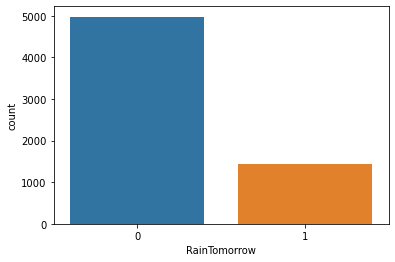

In [177]:
sns.countplot(df['RainTomorrow'])

In [178]:
# Our DataSet is imbalanced and balancing Technique is required

In [179]:
from imblearn.over_sampling import SMOTE

In [180]:
smt=SMOTE()

In [181]:
x2,y2=smt.fit_resample(x2,y2)

In [182]:
x2.shape

(9958, 22)

In [183]:
y2.shape

(9958,)

In [184]:
# Now lets check for skewness

In [185]:
x2.skew()

Date             0.324885
Location         0.062133
MinTemp         -0.095923
MaxTemp          0.298571
Rainfall         2.717662
Evaporation      0.632730
Sunshine        -0.791480
WindGustDir      0.085755
WindGustSpeed    0.443861
WindDir9am       0.219019
WindDir3pm      -0.113303
WindSpeed9am     0.613423
WindSpeed3pm     0.272601
Humidity9am     -0.434328
Humidity3pm     -0.038986
Pressure9am      0.081700
Pressure3pm      0.125936
Cloud9am        -0.411710
Cloud3pm        -0.398711
Temp9am         -0.033410
Temp3pm          0.340321
RainToday        1.183279
dtype: float64

In [186]:
# Applying Power Transform to remove skewness

In [187]:
x2_new=power_transform(x2)

In [188]:
pd.DataFrame(x2_new,columns=x2.columns).skew().sort_values(ascending=False)

RainToday        1.183279
Rainfall         0.538448
Evaporation      0.069372
WindGustSpeed    0.004466
Pressure3pm      0.000000
Pressure9am     -0.002042
Temp3pm         -0.013299
MaxTemp         -0.015083
Temp9am         -0.056207
Humidity3pm     -0.065804
WindSpeed3pm    -0.095735
MinTemp         -0.104713
Humidity9am     -0.106286
Sunshine        -0.114818
WindSpeed9am    -0.132022
WindDir9am      -0.132476
Location        -0.165227
Date            -0.174388
WindDir3pm      -0.226655
Cloud3pm        -0.229574
WindGustDir     -0.261933
Cloud9am        -0.270322
dtype: float64

In [189]:
x2=pd.DataFrame(x2_new,columns=x2.columns)

In [190]:
# Applying PCA to overcome multicollinearity

In [191]:
from sklearn.decomposition import PCA

In [192]:
pca=PCA(n_components=14)
x2=pca.fit_transform(x2)

In [193]:
# I used PCA here to reduce multicollinearity without dropping columns

In [194]:
# Now Applying Scaling 

In [195]:
x2=ss.fit_transform(x2)

In [196]:
# Using First model which is Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [198]:
lr=LogisticRegression()

In [199]:
# Finding Best Random State

In [200]:
for i in range(0,100):
    x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=i)
    lr.fit(x2train,y2train)
    predlr=lr.predict(x2test)
    lracc=accuracy_score(y2test,predlr)
    print('At Random state ',i,' Accuracy score is ',lracc*100)

At Random state  0  Accuracy score is  77.35943775100401
At Random state  1  Accuracy score is  76.85742971887551
At Random state  2  Accuracy score is  77.66064257028113
At Random state  3  Accuracy score is  78.3132530120482
At Random state  4  Accuracy score is  78.6144578313253
At Random state  5  Accuracy score is  77.86144578313254
At Random state  6  Accuracy score is  77.71084337349397
At Random state  7  Accuracy score is  78.1124497991968
At Random state  8  Accuracy score is  78.76506024096386
At Random state  9  Accuracy score is  79.16666666666666
At Random state  10  Accuracy score is  77.20883534136547
At Random state  11  Accuracy score is  77.76104417670683
At Random state  12  Accuracy score is  78.76506024096386
At Random state  13  Accuracy score is  79.41767068273093
At Random state  14  Accuracy score is  77.76104417670683
At Random state  15  Accuracy score is  78.96586345381526
At Random state  16  Accuracy score is  78.96586345381526
At Random state  17  Accura

In [201]:
# 17 is best Random state

In [202]:
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=17)
lr.fit(x2train,y2train)
predlr=lr.predict(x2test)
lracc=accuracy_score(y2test,predlr)
print('At Random state 17 Accuracy score is ',lracc*100)

At Random state 17 Accuracy score is  80.17068273092369


In [203]:
# Now Checking confusion matrix, classification report, roc_auc_score

In [204]:
print('ROC AUC Score ',roc_auc_score(y2test,predlr))
print('Confusion matrix\n',confusion_matrix(y2test,predlr))
print('Classification report\n',classification_report(y2test,predlr))

ROC AUC Score  0.801143790849673
Confusion matrix
 [[841 179]
 [216 756]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1020
           1       0.81      0.78      0.79       972

    accuracy                           0.80      1992
   macro avg       0.80      0.80      0.80      1992
weighted avg       0.80      0.80      0.80      1992



In [205]:
# Now Plotting Roc curve

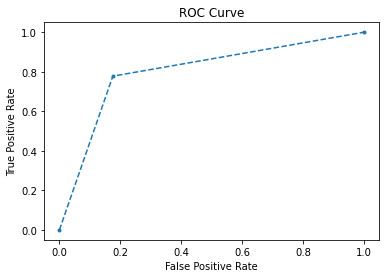

In [206]:
fpr,tpr,_=roc_curve(y2test,predlr)
plt.plot(fpr,tpr,ls='--',marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [207]:
# Now Checking It with CV

In [208]:
for i in range(2,10):
    cvlr=cross_val_score(lr,x2,y2,cv=i)
    cvlr_mean=cvlr.mean()
    print('At cv',i,'cross val score is',cvlr_mean*100,'with accuracy',lracc*100)

At cv 2 cross val score is 73.70958023699538 with accuracy 80.17068273092369
At cv 3 cross val score is 72.24378078750676 with accuracy 80.17068273092369
At cv 4 cross val score is 72.06371891745367 with accuracy 80.17068273092369
At cv 5 cross val score is 72.09403157582615 with accuracy 80.17068273092369
At cv 6 cross val score is 72.1547491956978 with accuracy 80.17068273092369
At cv 7 cross val score is 74.50417387304158 with accuracy 80.17068273092369
At cv 8 cross val score is 73.10889861697594 with accuracy 80.17068273092369
At cv 9 cross val score is 73.80084794753246 with accuracy 80.17068273092369


In [209]:
# 7 is Best CV

In [210]:
cvlr=cross_val_score(lr,x2,y2,cv=7)
cvlr_mean=cvlr.mean()
print('At cv 7 cross val score is',cvlr_mean*100,'with accuracy',lracc*100)

At cv 7 cross val score is 74.50417387304158 with accuracy 80.17068273092369


In [211]:
# Using 2nd model SVC

In [212]:
from sklearn.svm import SVC

In [213]:
svc=SVC()

In [214]:
# Finding best parameter using GRidSearchCV

In [215]:
parameter={'kernel':['rbf','poly','linear']}
gscvsvc=GridSearchCV(svc,parameter)
gscvsvc.fit(x2train,y2train)
print(gscvsvc.best_params_)

{'kernel': 'rbf'}


In [216]:
svc=SVC(kernel='rbf')
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=17)
svc.fit(x2train,y2train)
predsvc=svc.predict(x2test)
svcacc=accuracy_score(y2test,predsvc)
print('At Random state 17 accuracy is ',svcacc*100)

At Random state 17 accuracy is  86.44578313253012


In [217]:
# Now Checking confusion matrix, classification report, roc_auc_score

In [218]:
print('ROC AUC Score ',roc_auc_score(y2test,predsvc))
print('Confusion matrix\n',confusion_matrix(y2test,predsvc))
print('Classification report\n',classification_report(y2test,predsvc))

ROC AUC Score  0.8647421931735656
Confusion matrix
 [[870 150]
 [120 852]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1020
           1       0.85      0.88      0.86       972

    accuracy                           0.86      1992
   macro avg       0.86      0.86      0.86      1992
weighted avg       0.86      0.86      0.86      1992



In [219]:
# Now Plotting Roc curve

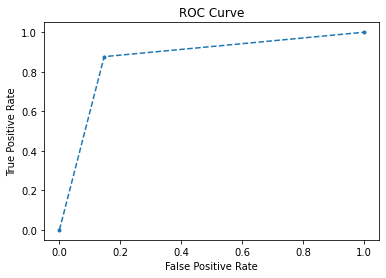

In [220]:
fpr,tpr,_=roc_curve(y2test,predsvc)
plt.plot(fpr,tpr,ls='--',marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [221]:
# Now Checking It with CV

In [222]:
cvsvc=cross_val_score(svc,x2,y2,cv=7)
cvsvc_mean=cvsvc.mean()
print('At cv 7 cross val score is',cvsvc_mean*100,'with accuracy',svcacc*100)

At cv 7 cross val score is 73.1397810109215 with accuracy 86.44578313253012


In [223]:
# Using 3rd model KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
knn=KNeighborsClassifier()

In [226]:
# Finding Best parameters using GridSearchCV

In [227]:
parameter={'algorithm':['auto','kd_tree','ball_tree','brute']}
gscvknn=GridSearchCV(knn,parameter)
gscvknn.fit(x2train,y2train)
print(gscvknn.best_params_)

{'algorithm': 'auto'}


In [228]:
knn=KNeighborsClassifier(algorithm='auto')
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=17)
knn.fit(x2train,y2train)
predknn=knn.predict(x2test)
knnacc=accuracy_score(y2test,predknn)
print('At Random state 17 Accuracy is ',knnacc*100)

At Random state 17 Accuracy is  83.38353413654619


In [229]:
# Now Checking confusion matrix, classification report, roc_auc_score

In [231]:
print('ROC AUC Score ',roc_auc_score(y2test,predknn)*100)
print('Confusion matrix\n',confusion_matrix(y2test,predknn))
print('Classification report\n',classification_report(y2test,predknn))

ROC AUC Score  83.57358992979908
Confusion matrix
 [[772 248]
 [ 83 889]]
Classification report
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1020
           1       0.78      0.91      0.84       972

    accuracy                           0.83      1992
   macro avg       0.84      0.84      0.83      1992
weighted avg       0.84      0.83      0.83      1992



In [232]:
# Now Plotting Roc curve

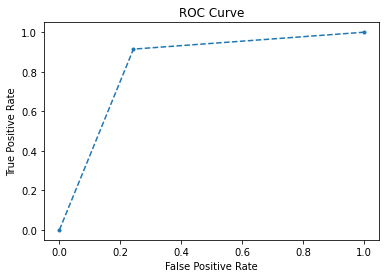

In [233]:
fpr,tpr,_=roc_curve(y2test,predknn)
plt.plot(fpr,tpr,ls='--',marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [234]:
# Now Checking It with CV

In [235]:
cvknn=cross_val_score(knn,x2,y2,cv=7)
cvknn_mean=cvknn.mean()
print('At cv 7 cross val score is',cvknn_mean*100,'with accuracy',knnacc*100)

At cv 7 cross val score is 69.45409177366977 with accuracy 83.38353413654619


In [236]:
# Using 4th model Decision Tree Classifier

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dtc=DecisionTreeClassifier()

In [239]:
# Finding best parameter using GridSearchCV

In [240]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','auto']}
gscvdtc=GridSearchCV(dtc,parameter)
gscvdtc.fit(x2train,y2train)
print(gscvdtc.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [241]:
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto')
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=17)
dtc.fit(x2train,y2train)
preddtc=dtc.predict(x2test)
dtcacc=accuracy_score(y2test,preddtc)
print('At Random state 16 Accuracy is ',dtcacc*100)

At Random state 16 Accuracy is  77.45983935742971


In [546]:
# Now Checking confusion matrix, classification report, roc_auc_score

In [242]:
print('ROC AUC Score ',roc_auc_score(y2test,preddtc)*100)
print('Confusion matrix\n',confusion_matrix(y2test,preddtc))
print('Classification report\n',classification_report(y2test,preddtc))

ROC AUC Score  77.4842653110627
Confusion matrix
 [[780 240]
 [209 763]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      1020
           1       0.76      0.78      0.77       972

    accuracy                           0.77      1992
   macro avg       0.77      0.77      0.77      1992
weighted avg       0.78      0.77      0.77      1992



In [243]:
# Now Plotting Roc curve

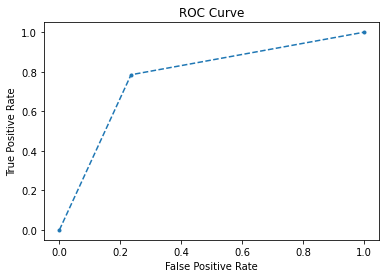

In [244]:
tpr,fpr,_=roc_curve(y2test,preddtc)
plt.plot(tpr,fpr,ls='--',marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [245]:
# Now Checking It with CV

In [246]:
# 7 is the best CV

In [247]:
cvdtc=cross_val_score(dtc,x2,y2,cv=7)
cvdtc_mean=cvdtc.mean()
print('At cv 7 cross val score is',cvdtc_mean*100,'with accuracy',dtcacc*100)

At cv 7 cross val score is 71.16074773190691 with accuracy 77.45983935742971


In [248]:
# Using 5th model Random Forest Regressor

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
rfc=RandomForestClassifier()

In [251]:
# Finding Best parameter using GridSearchCV

In [252]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None']}
gscvrfc=GridSearchCV(rfc,parameter)
gscvrfc.fit(x2train,y2train)
print(gscvrfc.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt'}


In [253]:
rfc=RandomForestClassifier(criterion='gini',max_features='sqrt')
rfc.fit(x2train,y2train)
predrfc=rfc.predict(x2test)
rfcacc=accuracy_score(y2test,predrfc)

In [572]:
# Now Checking accuracy score, confusion matrix, classification report, roc_auc_score

In [254]:
print('Accuracy of Random forest is ',rfcacc*100)
print('ROC AUC Score ',roc_auc_score(y2test,preddtc)*100)
print('Confusion matrix\n',confusion_matrix(y2test,preddtc))
print('Classification report\n',classification_report(y2test,preddtc))

Accuracy of Random forest is  87.70080321285141
ROC AUC Score  77.4842653110627
Confusion matrix
 [[780 240]
 [209 763]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      1020
           1       0.76      0.78      0.77       972

    accuracy                           0.77      1992
   macro avg       0.77      0.77      0.77      1992
weighted avg       0.78      0.77      0.77      1992



In [255]:
# Now Plotting Roc curve

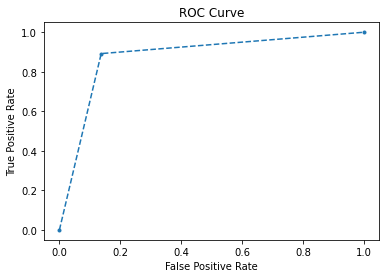

In [256]:
tpr,fpr,_=roc_curve(y2test,predrfc)
plt.plot(tpr,fpr,ls='--',marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [257]:
# Now Checking It with CV

In [583]:
# 7 is the best CV

In [258]:
cvrfc=cross_val_score(rfc,x2,y2,cv=7)
cvrfc_mean=cvrfc.mean()
print('At cv 7 cross val score is',cvrfc_mean*100,'with accuracy',rfcacc*100)

At cv 7 cross val score is 78.16016924514749 with accuracy 87.70080321285141


# Saving the models

In [259]:
# Saving Rainfall amount best model which is Random forest regressor as it has high r2_score, and less difference in cross val score 
# and r2_score and it has lower Mean squared error and mean absolute error as compared to others

In [260]:
import pickle as pkl

In [261]:
filename1='rainfallamount.pkl'
pkl.dump(rfr,open(filename1,'wb'))

In [262]:
# Loading the model and checking its score

In [263]:
output1=pkl.load(open('rainfallamount.pkl','rb'))
result1=output1.score(x1test,y1test)
result1*100

48.688187388133194

In [264]:
# Testing the best regression model

In [268]:
Rainfallamount_model=pd.DataFrame([output1.predict(x1test)[:],(predrfr)[:]],index=['Actual','Predicted'])
Rainfallamount_model

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281
Actual,0.247034,0.130017,0.031758,1.676724,0.269767,4.778576,0.148159,0.090975,0.482185,1.207734,...,4.8757,0.046578,0.096827,0.010667,0.123914,0.284813,0.364142,6.660342,0.363775,0.35961
Predicted,0.247034,0.130017,0.031758,1.676724,0.269767,4.778576,0.148159,0.090975,0.482185,1.207734,...,4.8757,0.046578,0.096827,0.010667,0.123914,0.284813,0.364142,6.660342,0.363775,0.35961


In [269]:
# Saving Best Classification model which is Random Forest Classifier because it has greater f1 score, accuracy score and auc roc score
# and also it has less false positive and false negative

In [270]:
filename2='rainfalltomorrow.pkl'
pkl.dump(rfc,open(filename2,'wb'))

In [271]:
# Loading the model and checking its score

In [272]:
output2=pkl.load(open('rainfalltomorrow.pkl','rb'))
result2=output2.score(x2test,y2test)
result2*100

87.70080321285141

In [273]:
# Testing the best Classification model

In [276]:
Rainfalltomorrow_model=pd.DataFrame([output2.predict(x2test)[:],(predrfc)[:]],index=['Actual','Predicted'])
Rainfalltomorrow_model

,0,1,2,3,4,5,6,7,8,9,...,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991
Actual,0,0,0,1,0,0,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0
Predicted,0,0,0,1,0,0,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0


In [277]:
#-----------------------------------------------Thank-you--------------------------------------------------------------------